<a href="https://colab.research.google.com/github/LeoXia360/nfl-data/blob/main/nfl/wide-receivers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy
from xgboost import XGBClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
# This data set contains WRs from 2010+
nfl_file_path = '/content/drive/MyDrive/Colab Notebooks/wr_data_cleaned.csv'
X = pd.read_csv(nfl_file_path)

X.drop(X.iloc[:, 0:1], inplace = True, axis = 1)
y = X["# of top  24 finishes"]
X.drop(['# of top  24 finishes', 'DP', 'DR', 'Draft Year', '# of 1000 Rec yards seasons'], inplace = True, axis=1)
X.head()


,Conference,Age IN DRAFT YEAR,Years Played,G,AVG PPG,rec,YARDS,YPR,REC/g,FINAL MS YARDS RK,...,weight,Bench,Verticle,Broad,Shuttle,3 Cone,WaSS,HaSS,Hand Size,Arm Length
0,2,22,2,25,19.135897,132,2413,18.280303,5.280000,1,...,166,10.0,35.9,121.75,4.250000,6.96000,97.680000,95.790000,9.000,30.500
1,10,21,3,37,18.129274,213,2889,13.563380,5.756757,1,...,228,27.0,38.5,122.00,4.251491,6.96476,108.285931,110.868757,9.500,33.000
2,6,22,4,41,17.031250,231,3526,15.264069,5.634146,1,...,188,15.0,36.5,121.00,4.150000,6.96476,108.962928,95.321878,8.375,29.750
3,11,22,3,34,17.585354,189,2984,15.788360,5.558824,1,...,226,19.0,36.5,120.00,4.251491,6.96476,111.212364,108.195716,9.750,32.875
4,11,21,3,21,11.970635,67,1228,18.328358,3.190476,3,...,228,27.0,40.5,134.00,4.500000,7.38000,129.721887,136.412452,9.875,34.875


In [105]:
from sklearn.model_selection import train_test_split

seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [106]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [107]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# X_test["# of top  24 finishes"]

In [108]:
# predictions

In [109]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.50%


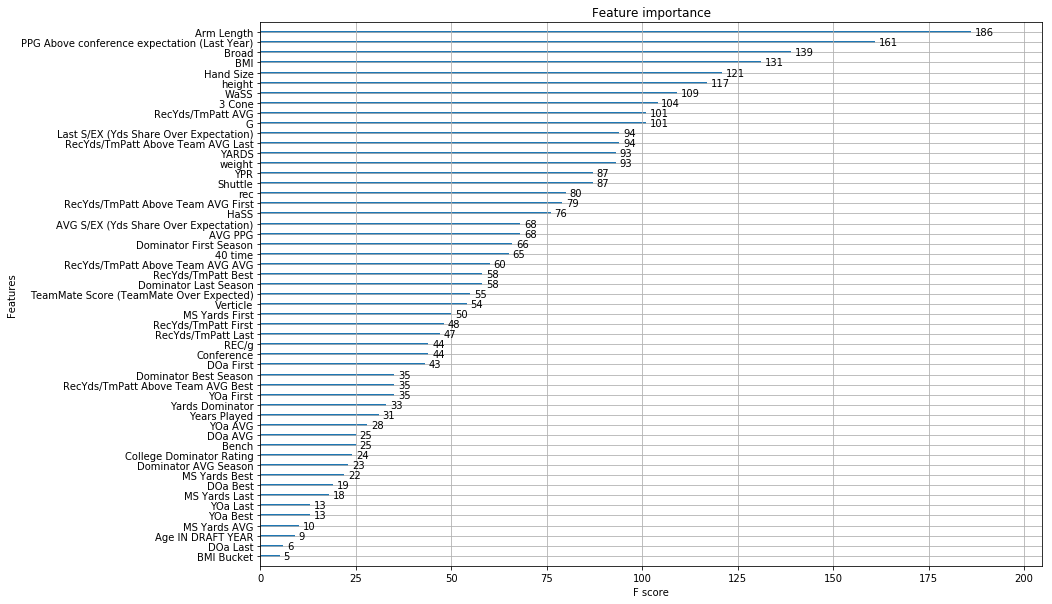

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [110]:
from google.colab import files

plt.rcParams["figure.figsize"] = (14, 10)

# plot feature importance
ax = xgb.plot_importance(model)
ax.figure.savefig('feature_importance.png')

plt.show()

files.download("feature_importance.png") 
